In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/iris-data.csv')
df.head()
# df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Outlier Check 異常值檢測
### Removing all null values row

In [3]:
#df.info() #before 

#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


/Users/jerry/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


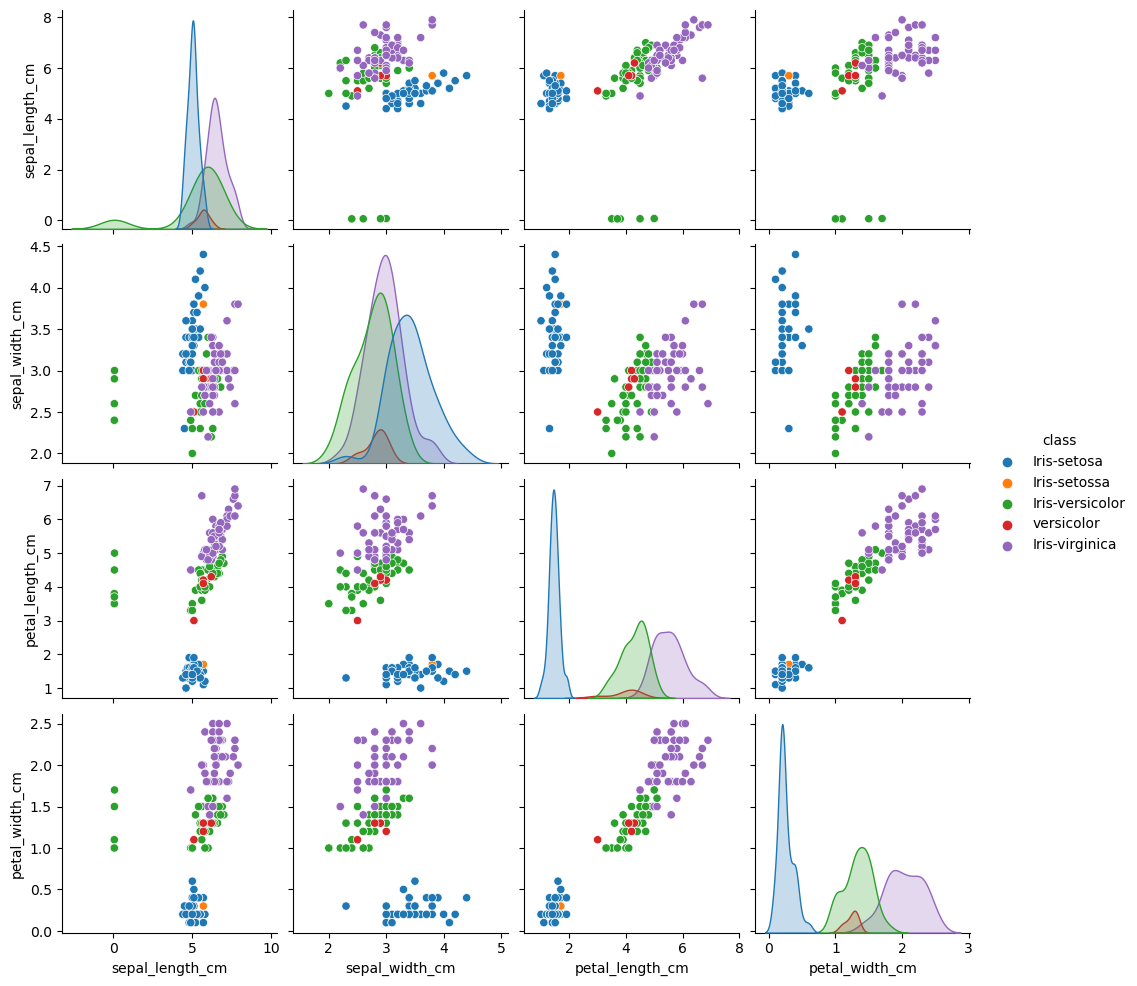

In [4]:
sns.pairplot(df, hue='class', size=2.5)

### 修正異常值 (class 類名異常)
From the plots it can be observed that there is some abnormality in the class name. 

從圖中可以看出，class 類名存在一些異常。根據可以得出兩個觀察結果，根據問題做些修正
- For 5 data points 'Iris-versicolor' has been specified as 'versicolor' 
- For 1 data points, 'Iris-setosa' has been specified as 'Iris-setossa'

In [5]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [6]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

### 修正異常值 (value 數值異常)
Consider only two class 'Iris-setosa' and 'Iris-versicolor'. Dropping all other class

僅考慮兩類“Iris-setosa”和“Iris-versicolor” 放棄所有其他課程

In [7]:
# 僅考慮兩類“Iris-setosa”和“Iris-versicolor” 放棄 Iris-virginica
df = df[df['class'] != 'Iris-virginica']
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/Users/jerry/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


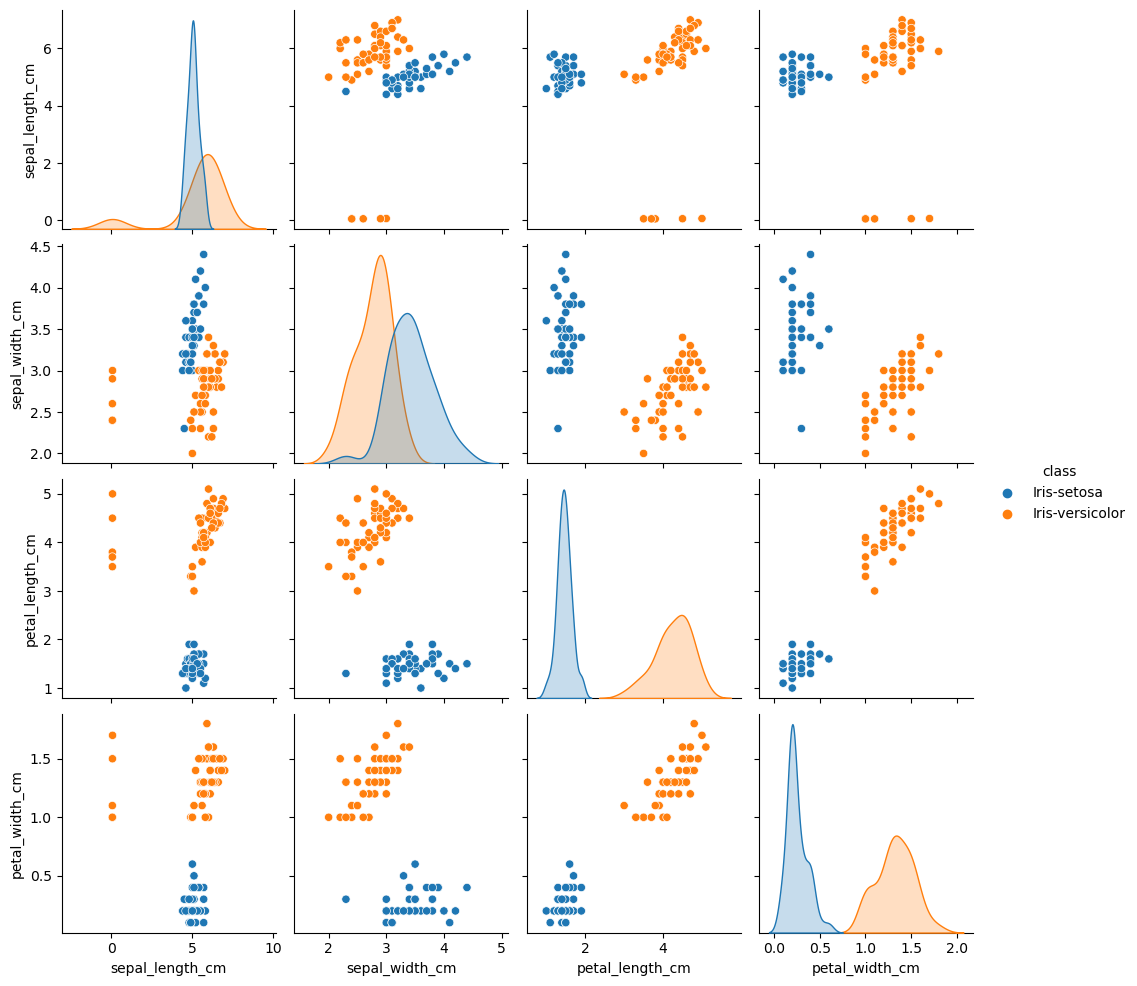

In [8]:
sns.pairplot(df, hue='class', size=2.5)

From the above plot, sepal_width and sepal_length seems to have outliers. 

從上圖中，sepal_width 和 sepal_length 似乎有異常值。 

For 5 data points values are below 1 and they seem to be outliers. So, these data points are considered to be in 'm' and are converted to 'cm'.

5 個數據點的值低於 1，它們似乎是異常值。 因此，這些數據點被視為以“m”為單位並轉換為“cm”。

array([[<Axes: title={'center': 'sepal_length_cm'}>]], dtype=object)

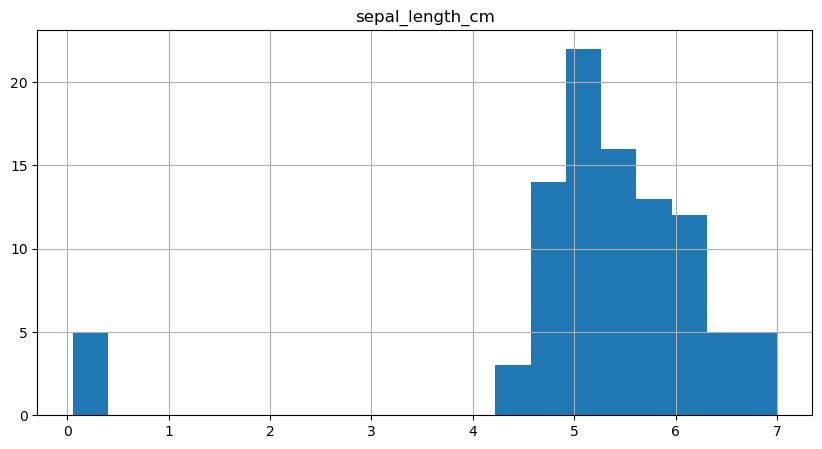

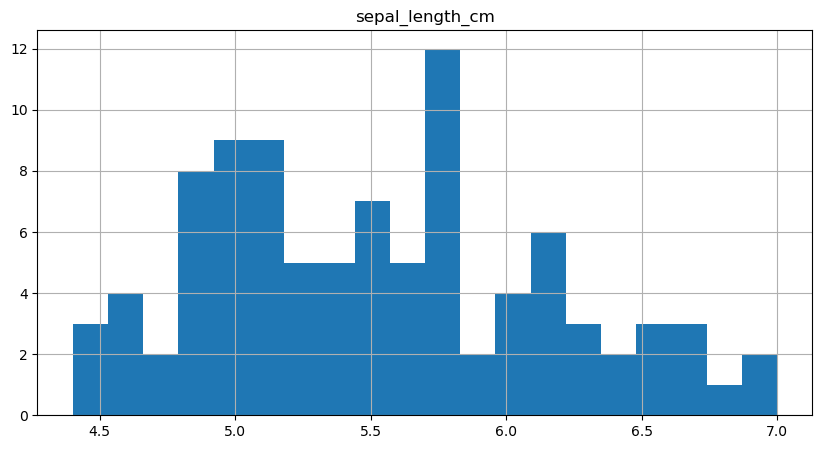

In [9]:
#SEPAL LENGTH
df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))
df.loc[df.sepal_length_cm < 1, ['sepal_length_cm']] = df['sepal_length_cm']*100
df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

/Users/jerry/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


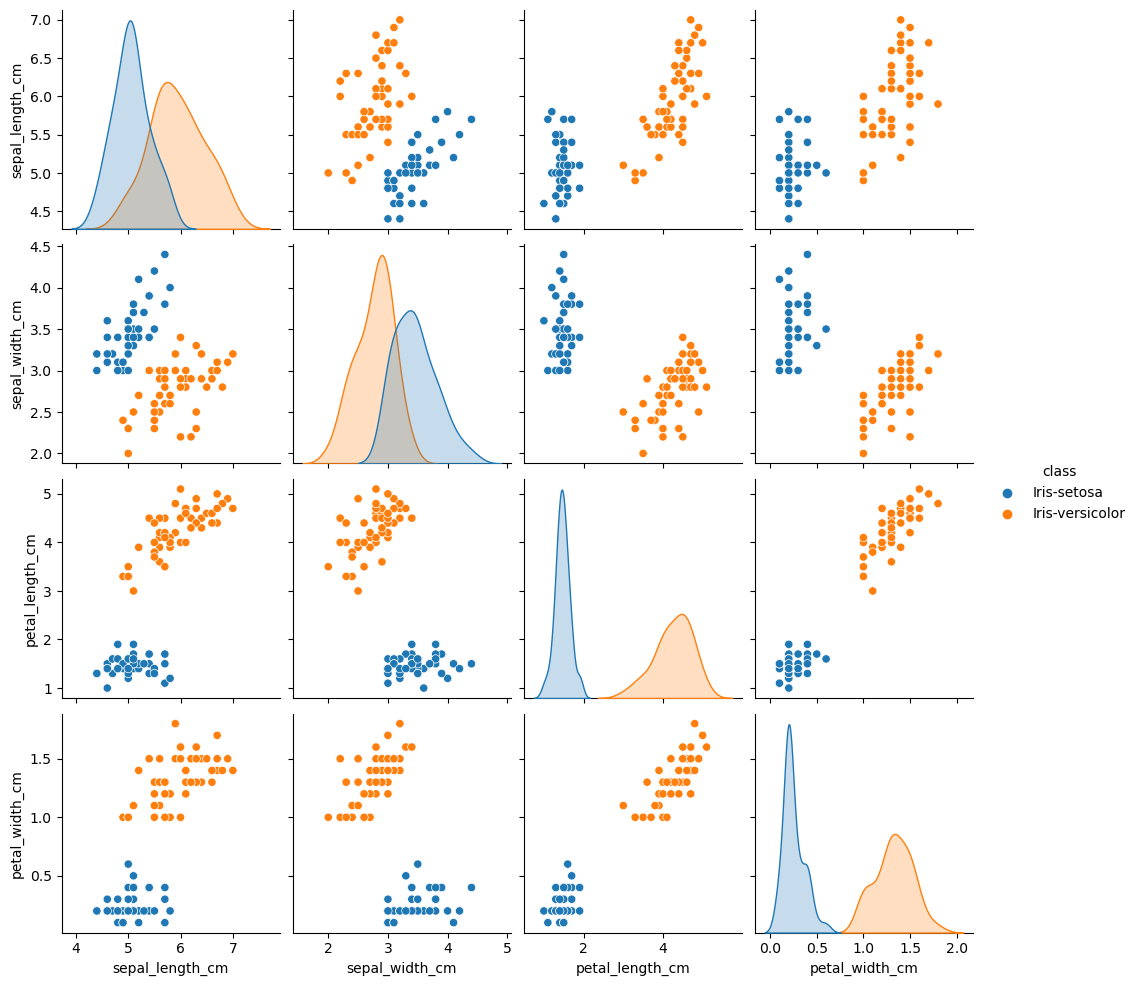

In [10]:
#SEPAL WIDTH
df = df.drop(df[(df['class'] == "Iris-setosa") & (df['sepal_width_cm'] < 2.5)].index)
sns.pairplot(df, hue='class', size=2.5)

## Splitting data into test and train

In [11]:
# Label Encoding
df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [12]:
# 切分出 inp_df (包含sepal_length, sepal_width, petal_length, petal_width) 和 out_df (包含 class)
inp_df = df.drop(df.columns[[4]], axis=1)
out_df = df.drop(df.columns[[0,1,2,3]], axis=1)

In [13]:
inp_df = StandardScaler().fit_transform(inp_df)
X_train, X_test, y_train, y_test = train_test_split(inp_df, 
                                                    out_df, 
                                                    test_size=0.2, random_state=42)
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.values
y_ts_arr = y_test.values
#
print('Train - Predictors shape', X_tr_arr.shape)
print('Test - Predictors shape', X_ts_arr.shape)
print('Train - Target shape', y_tr_arr.shape)
print('Test - Target shape', y_ts_arr.shape)

Train - Predictors shape (75, 4)
Test - Predictors shape (19, 4)
Train - Target shape (75, 1)
Test - Target shape (19, 1)


## Metrics for model evaluation 模型評估指標

In [14]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    return grads, cost

def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)

        if (i % 500 == 0):
            costs.append(cost)
            print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [15]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)

#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)

#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)

Number of Features 4
Cost after 0 iteration is 0.693147
Cost after 500 iteration is 0.659488
Cost after 1000 iteration is 0.628245
Cost after 1500 iteration is 0.599235
Cost after 2000 iteration is 0.572284
Cost after 2500 iteration is 0.547227
Cost after 3000 iteration is 0.523911
Cost after 3500 iteration is 0.502196
Cost after 4000 iteration is 0.481950
Optimized weights [[-0.13397714  0.13130132 -0.18248682 -0.18319564]]
Optimized intercept -0.024134631921343585


In [16]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [21]:
# Train and test accuracy of the system is 100% 
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)

m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Training Accuracy 1.0
Test Accuracy 1.0


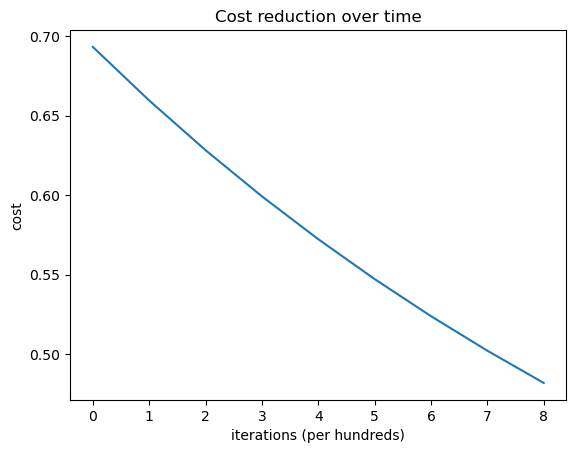

In [18]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

## Logistic Regression Model Construction 模型建構
- Standardization(): 平均&變異數標準化：將所有特徵標準化，也就是高斯分佈。使得數據的平均值為 0，方差為 1。
- fit_transform(): 是fit()函數和transform()函數的組合，先進行fit，之後再進行transform（標準化）

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_tr_arr, y_tr_arr)

/Users/jerry/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
print('regression Parameters: Intercept',clf.intercept_) #截距
print('regression Parameters: Co-efficient',clf.coef_)   #參數(斜率)

regression Parameters: Intercept [-0.55607279]
regression Parameters: Co-efficient [[-0.69791666  1.16455265 -1.40231641 -1.47095115]]


In [26]:
pred = clf.predict(X_ts_arr)
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy from sk-learn: 1.0
